In [ ]:
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer

from filtering import compute_perplexity, compute_solution_perplexity, filter_dataset

import matplotlib.pyplot as plt

/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
code_exercises = load_dataset("jinaai/code_exercises")["train"].select(range(1000)) # choose 1000 samples
code_exercises

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dataset({
    features: ['problem', 'solution'],
    num_rows: 1000
})

In [ ]:
# that is just an example
# Probably we need to use another model for perplexity calculation

model_name = "microsoft/codebert-base"
model = AutoModelForCausalLM.from_pretrained(model_name).cuda()
tokenizer = AutoTokenizer.from_pretrained(model_name)

model.eval()

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`
Some weights of RobertaForCausalLM were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForCausalLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): 

In [4]:
code_exercises = code_exercises.map(compute_perplexity, fn_kwargs={"model": model, "tokenizer": tokenizer}, batched=True, batch_size=8)
code_exercises = code_exercises.map(compute_solution_perplexity, fn_kwargs={"model": model, "tokenizer": tokenizer}, batched=True, batch_size=8)

Map: 100%|██████████| 1000/1000 [01:00<00:00, 16.45 examples/s]


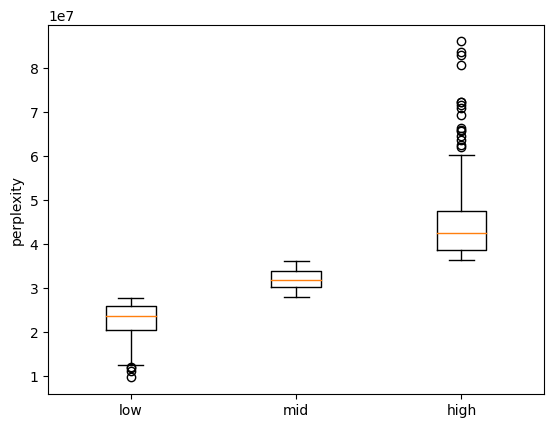

In [5]:
score = "perplexity"
low_perplexity = filter_dataset(code_exercises, score=score, p=0.33, part="low")
mid_perplexity = filter_dataset(code_exercises, score=score, p=0.33, part="mid")
high_perplexity = filter_dataset(code_exercises, score=score, p=0.33, part="high")


plt.boxplot(
    [data[score] for data in [low_perplexity, mid_perplexity, high_perplexity]],
    labels=["low", "mid", "high"],
)

plt.ylabel(score)
plt.show()

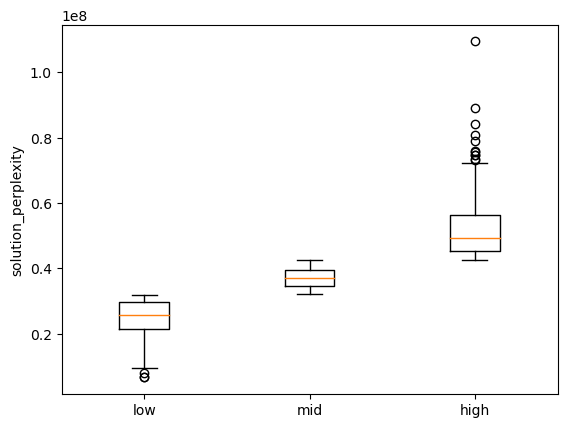

In [6]:
score = "solution_perplexity"
low_perplexity = filter_dataset(code_exercises, score=score, p=0.33, part="low")
mid_perplexity = filter_dataset(code_exercises, score=score, p=0.33, part="mid")
high_perplexity = filter_dataset(code_exercises, score=score, p=0.33, part="high")


plt.boxplot(
    [data[score] for data in [low_perplexity, mid_perplexity, high_perplexity]],
    labels=["low", "mid", "high"],
)

plt.ylabel(score)
plt.show()